
# Project: Investigate TMDB dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# **First insights**
1- We can see that some columns like genres and cast contain an "|", they need to be cleaned 


2- some feature are not important like tagline, homepage and imdb id, we will eliminate them 

In [3]:
df.drop(columns=['imdb_id','homepage','tagline','overview'], axis=1, inplace=True)

In [4]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
df_cast = (df['cast'].str.split('|').str[0])
df_director = (df['director'].str.split('|').str[0])
df_keywords = (df['keywords'].str.split('|').str[0])
df_genres = (df['genres'].str.split('|').str[0])
df_production = (df['production_companies'].str.split('|').str[0])

In [6]:
df_director = df_director.to_frame()
df_cast = df_cast.to_frame()
df_keywords = df_keywords.to_frame()
df_production = df_production.to_frame()
df_genres = df_genres.to_frame()

In [7]:
#type(df_genres)
#df_genres.rename(columns = {'genres':'Genres'},inplace=True)
#df_genres.columns

In [8]:
df['casting'] = df_cast['cast']
df['movie_genre'] = df_genres['genres']

In [9]:
df['movie_director'] = df_director['director']
df['movie_keywords'] = df_keywords['keywords']

In [10]:
df['prod_company'] = df_production['production_companies']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
casting                 10790 non-null object
movie_genre             10843 non-null object
movie_director       

In [12]:
#df_director.drop(df_director.columns[1], axis=1, inplace=True)
#df_director

In [13]:
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
casting           10790 non-null object
movie_genre       10843 non-null object
movie_director    10822 non-null object
movie_keywords    9373 non-null object
prod_company      9836 non-null object
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


In [14]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casting,movie_genre,movie_director,movie_keywords,prod_company
0,135397,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Colin Trevorrow,monster,Universal Studios
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,George Miller,future,Village Roadshow Pictures
2,262500,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,Robert Schwentke,based on novel,Summit Entertainment
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,J.J. Abrams,android,Lucasfilm
4,168259,9.335014,190000000,1506249360,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,James Wan,car race,Universal Pictures


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
casting           10790 non-null object
movie_genre       10843 non-null object
movie_director    10822 non-null object
movie_keywords    9373 non-null object
prod_company      9836 non-null object
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


# **Release date not in datetime datatype**

We will convert release_date to datetime type

In [16]:
#df.drop(columns=['release_date'], axis=1, inplace=True)
#df
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
release_date      10866 non-null datetime64[ns]
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
casting           10790 non-null object
movie_genre       10843 non-null object
movie_director    10822 non-null object
movie_keywords    9373 non-null object
prod_company      9836 non-null object
dtypes: datetime64[ns](1), float64(4), int64(6), object(6)
memory usage: 1.4+ MB


# 

## check for nulls and filling them

In [18]:
df.isnull().sum()

id                   0
popularity           0
budget               0
revenue              0
original_title       0
runtime              0
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
casting             76
movie_genre         23
movie_director      44
movie_keywords    1493
prod_company      1030
dtype: int64

In [19]:
df.fillna(0)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casting,movie_genre,movie_director,movie_keywords,prod_company
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Colin Trevorrow,monster,Universal Studios
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,George Miller,future,Village Roadshow Pictures
2,262500,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,Robert Schwentke,based on novel,Summit Entertainment
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,J.J. Abrams,android,Lucasfilm
4,168259,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,James Wan,car race,Universal Pictures
5,281957,9.110700,135000000,532950503,The Revenant,156,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,Leonardo DiCaprio,Western,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship,Regency Enterprises
6,87101,8.654359,155000000,440603537,Terminator Genisys,125,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,Arnold Schwarzenegger,Science Fiction,Alan Taylor,saving the world,Paramount Pictures
7,286217,7.667400,108000000,595380321,The Martian,141,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,Matt Damon,Drama,Ridley Scott,based on novel,Twentieth Century Fox Film Corporation
8,211672,7.404165,74000000,1156730962,Minions,91,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,Sandra Bullock,Family,Kyle Balda,assistant,Universal Pictures
9,150540,6.326804,175000000,853708609,Inside Out,94,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,Amy Poehler,Comedy,Pete Docter,dream,Walt Disney Pictures


## Drop duplicated values

In [20]:
sum(df.duplicated())

1

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which year has largest number of movies!)

In [23]:
numberofmovies = df.groupby('release_year').count()['id']

numberofmovies

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

In [24]:
#print(type(numberofmovies))
numberofmovies.to_frame()
numberofmovies.rename(columns = {'release_year':'year', 'id': 'number_of_movies'})

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
dtype: int64

In [25]:
numberofmovies.nlargest()

release_year
2014    700
2013    659
2015    629
2012    588
2011    540
Name: id, dtype: int64

#### From there we see that year 2014 has the highest release of movies = 700

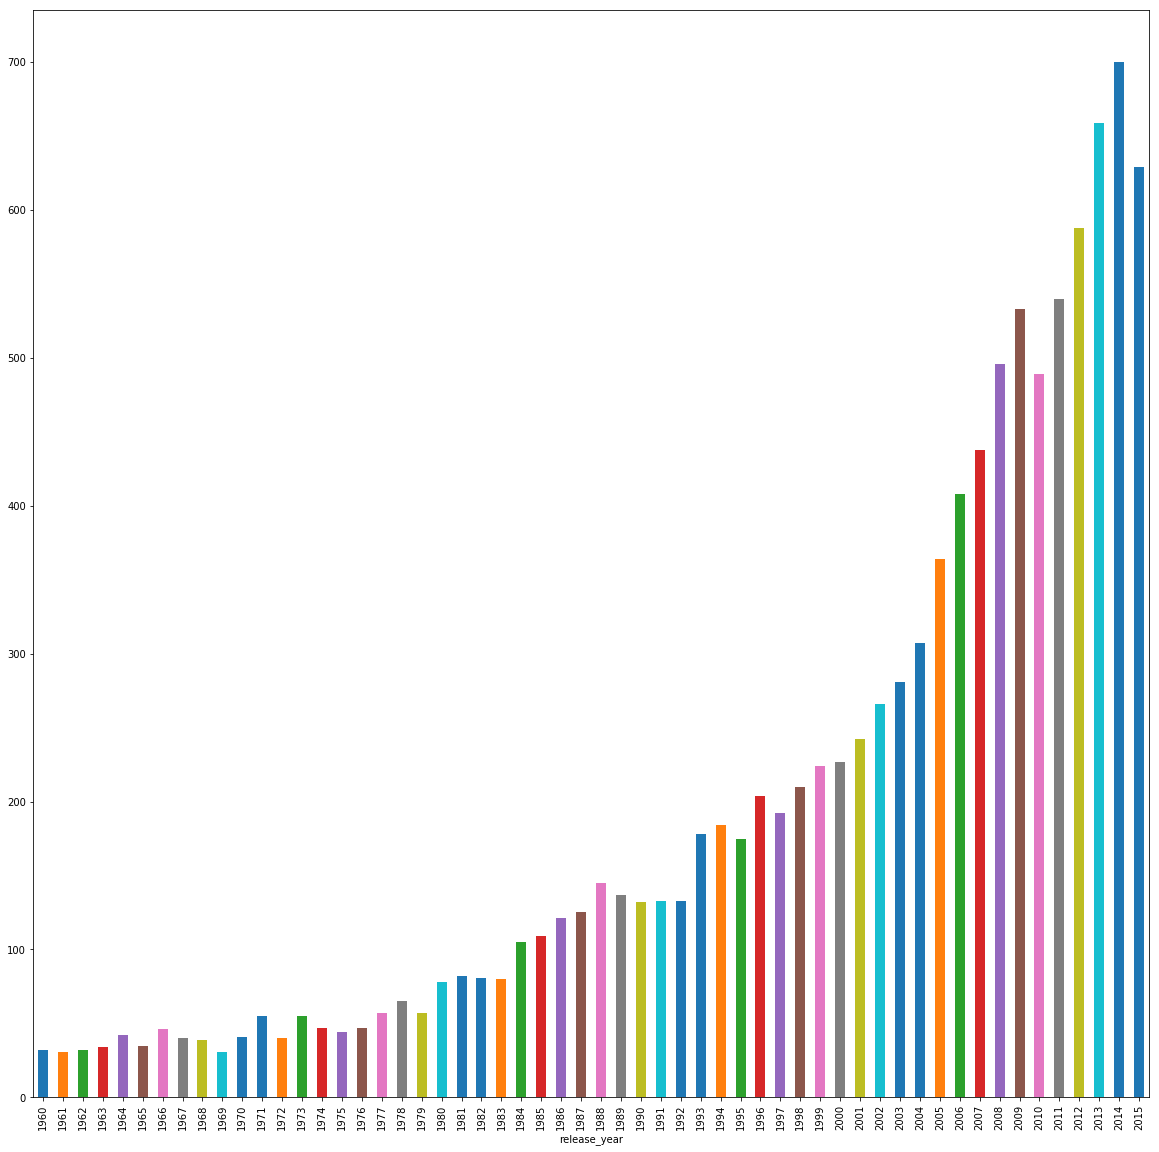

In [26]:
#plt.plot(numberofmovies)
numberofmovies.plot(kind='bar', figsize=(20,20))

### Research Question 2  (Which movie has the lowest profit and which has the highest and what is the characteristics of both ?!)

In [27]:
df['profit'] = df['revenue'] - df['budget']

In [28]:
df[['profit','original_title']]

,profit,original_title
0,1363528810,Jurassic World
1,228436354,Mad Max: Fury Road
2,185238201,Insurgent
3,1868178225,Star Wars: The Force Awakens
4,1316249360,Furious 7
5,397950503,The Revenant
6,285603537,Terminator Genisys
7,487380321,The Martian
8,1082730962,Minions
9,678708609,Inside Out


In [29]:
print(df[df.profit == df.profit.max()]['original_title']) 

1386    Avatar
Name: original_title, dtype: object


##### Avatar has the largest profit and the following code we will see its details

In [30]:
df[df.original_title == 'Avatar']

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casting,movie_genre,movie_director,movie_keywords,prod_company,profit
1386,19995,9.432768,237000000,2781505847,Avatar,162,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,Sam Worthington,Action,James Cameron,culture clash,Ingenious Film Partners,2544505847


In [31]:
print(df[df.profit == df.profit.min()]['original_title']) 

2244    The Warrior's Way
Name: original_title, dtype: object


##### The warrior's day has the smallest profit and the following code we will see its details

In [32]:
df[df.original_title == "The Warrior's Way"]

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casting,movie_genre,movie_director,movie_keywords,prod_company,profit
2244,46528,0.25054,425000000,11087569,The Warrior's Way,100,2010-12-02,74,6.4,2010,425000000.0,11087569.0,Kate Bosworth,Adventure,Sngmoo Lee,assassin,Boram Entertainment Inc.,-413912431


In [33]:
print(df[df.budget == df.budget.max()]['original_title']) 

2244    The Warrior's Way
Name: original_title, dtype: object


In [34]:
df[df.budget == df.budget.min()]['original_title']


30                                             Mr. Holmes
36                                                 Solace
72                                       Beyond the Reach
74                                 Mythica: The Darkspore
75                         Me and Earl and the Dying Girl
88                                                 Equals
92                               Mythica: The Necromancer
95                 Alvin and the Chipmunks: The Road Chip
100                                          Frozen Fever
101                                             High-Rise
103                              Spooks: The Greater Good
116                    The Scorpion King: The Lost Throne
119                                   Absolutely Anything
122                                                Everly
125                                             Slow West
128                                      Mistress America
130                                            True Story
132           

#### We cannot deduce the smallest budget because of zero's values that were filled instead of NaN

In [35]:
df['budget'] = df['budget'].replace(0, np.NAN)

In [36]:
df[df.budget == df.budget.min()]['original_title']

1151                           Fear Clinic
2618                          Lost & Found
3065    Angus, Thongs and Perfect Snogging
3581               Love, Wedding, Marriage
Name: original_title, dtype: object

##### Fear Clinic has the smallest budget 

# Checking the correlation between budget and revenue

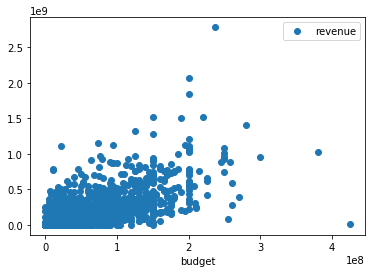

In [37]:
df.plot(x='budget', y='revenue', style='o')

In [38]:
col1=df['budget']
col2=df['revenue']
col3=df['profit']
correlation1 = col1.corr(col2)
correlation2 = col1.corr(col3)
print(correlation1 * 100)
print(correlation2 * 100)

70.0161727315
53.84476576


In [39]:
print('The correlation coefficient between budget and revenue =' ,correlation1)
print('The correlation coefficient between budget and profit =' ,correlation2)

The correlation coefficient between budget and revenue = 0.700161727315
The correlation coefficient between budget and profit = 0.5384476576


### Research Question 3  (Which genre has the highest movies release ?!)# 

In [40]:
genre = df.groupby('movie_genre').count()['id']

genre

movie_genre
Action             1590
Adventure           586
Animation           403
Comedy             2319
Crime               380
Documentary         432
Drama              2453
Family              144
Fantasy             272
Foreign               9
History              44
Horror              915
Music               100
Mystery             125
Romance             186
Science Fiction     214
TV Movie             78
Thriller            491
War                  59
Western              42
Name: id, dtype: int64

In [41]:
genre.nlargest()

movie_genre
Drama        2453
Comedy       2319
Action       1590
Horror        915
Adventure     586
Name: id, dtype: int64

In [42]:
genres= genre.copy()

In [43]:
genres.sort_values(ascending=False, inplace=True)

Text(0,0.5,'genres')

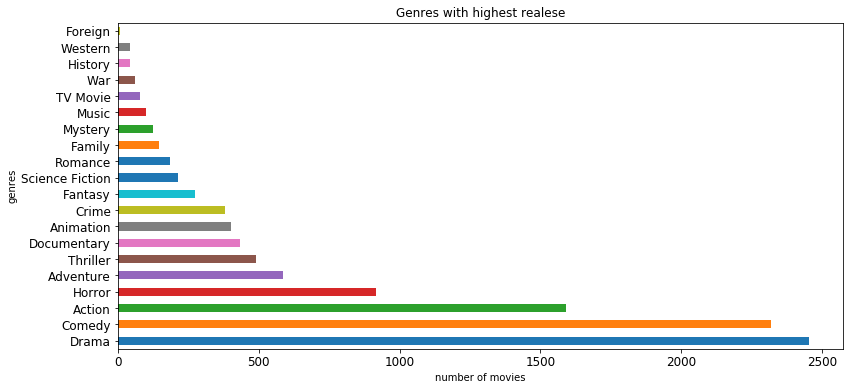

In [44]:
genres.plot(kind='barh', figsize=(13,6), fontsize=12)
plt.title('Genres with highest realese')
plt.xlabel('number of movies')
plt.ylabel('genres')
#print(type(genre))

###  Drama has the largest number of movies

## Research Question 3  (Which month released highest number of movies in all years? and which month made the highest average revenue ?!)# 

In [45]:
month_release = df['release_date'].dt.month
month_release.head()

0     6
1     5
2     3
3    12
4     4
Name: release_date, dtype: int64

In [46]:
numberofreleases = month_release.value_counts().sort_index()
numberofreleases.nlargest()

9     1331
10    1153
12     985
1      919
8      918
Name: release_date, dtype: int64

Text(0,0.5,'Number of releases')

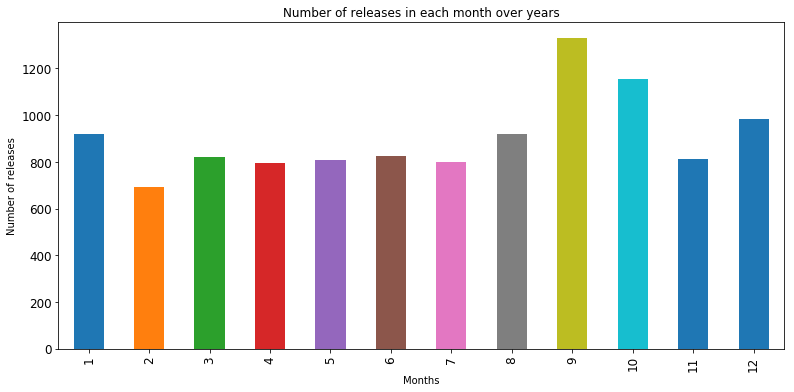

In [55]:
numberofreleases.plot(kind = 'bar',figsize=(13,6), fontsize=12)
plt.title('Number of releases in each month over years')
plt.xlabel('Months')
plt.ylabel('Number of releases')

### September has the highest movie release over the years

In [48]:
#df.merge(month_release.to_frame(), left_index=True, right_index=True, inplace=True)

month_release = month_release.to_frame()
#month_release.rename(columns = {'release_date':'release_month'}, inplace=True)

In [49]:
print(type(month_release))

<class 'pandas.core.frame.DataFrame'>


In [50]:
#df = df.join(month_release)
#df.append(month_release, ignore_index = True) 
#df.info()

#month_release.head(1)
month_release['revenue'] = df['revenue']
month_release.head(1)


,release_date,revenue
0,6,1513528810


In [51]:
average_revenue_per_month = month_release.groupby('release_date').mean()
average_revenue_per_month

,revenue
release_date,
1,1.411151e+07
2,2.864513e+07
3,3.819337e+07
4,3.311576e+07
5,6.236695e+07
6,7.455935e+07
7,5.679878e+07
8,2.775356e+07
9,1.933244e+07


In [52]:
#average_revenue_per_month = average_revenue_per_month.to_frame()
#average_revenue_per_month.nlargest()
print(type(average_revenue_per_month))
average_revenue_per_month['revenue'].nlargest()


<class 'pandas.core.frame.DataFrame'>


release_date
6     7.455935e+07
5     6.236695e+07
12    5.909834e+07
7     5.679878e+07
11    5.638361e+07
Name: revenue, dtype: float64

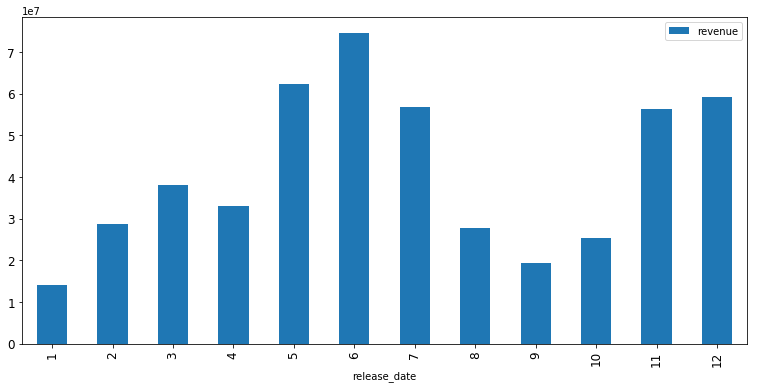

In [53]:
average_revenue_per_month.plot(kind='bar',figsize=(13,6), fontsize=12)
plt.title('Avg Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Avg Rene')

#### June has the largest average revenue over the years

<a id='conclusions'></a>
## Conclusions

1- year 2014 has the highest release of movies = 700


2- Avatar has the largest profit 

   The warrior's day has the smallest profit
   
   Fear Clinic has the smallest budget 
   
   
3- The correlation coefficient between budget and revenue = 0.700161727315

   The correlation coefficient between budget and profit = 0.5384476576 
   
   
4- Drama has the largest number of movies


5- September has the highest movie release over the years


6- June has the largest average revenue over the years

   
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0